In [403]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# df1 = pd.read_excel('online_retail_II.xlsx')
# df1.to_csv('original_data_09_10.csv', index=False)


# df2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
# df2.to_csv('original_data_10_11.csv', index=False)


In [404]:
df_09_10 = pd.read_csv('original_data_09_10.csv')
df_10_11 = pd.read_csv('original_data_10_11.csv')

In [405]:
df = pd.concat([df_09_10, df_10_11], ignore_index=True)


In [406]:
# df.to_csv("concated_data.csv")


In [407]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [409]:
df.describe().round(1)

,Quantity,Price,Customer ID
count,1067371.0,1067371.0,824364.0
mean,9.9,4.6,15324.6
std,172.7,123.6,1697.5
min,-80995.0,-53594.4,12346.0
25%,1.0,1.2,13975.0
50%,3.0,2.1,15255.0
75%,10.0,4.2,16797.0
max,80995.0,38970.0,18287.0


In [410]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [411]:
df = df.dropna(subset=['Customer ID'])

In [412]:
doublons = df[df.duplicated(subset=['InvoiceDate', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country'], keep=False)]
doublons_trie = doublons.sort_values(by=['Description'])
doublons_trie.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
67284,495365,21955,DOORMAT UNION JACK GUNS AND ROSES,1,2010-01-24 12:15:00,6.75,14701.0,United Kingdom
67267,495365,21955,DOORMAT UNION JACK GUNS AND ROSES,1,2010-01-24 12:15:00,6.75,14701.0,United Kingdom
58752,494666,21955,DOORMAT UNION JACK GUNS AND ROSES,1,2010-01-17 14:53:00,6.75,13869.0,United Kingdom
58751,494666,21955,DOORMAT UNION JACK GUNS AND ROSES,1,2010-01-17 14:53:00,6.75,13869.0,United Kingdom
67484,495372,22150,3 STRIPEY MICE FELTCRAFT,1,2010-01-24 12:58:00,1.95,14396.0,United Kingdom
67481,495372,22150,3 STRIPEY MICE FELTCRAFT,1,2010-01-24 12:58:00,1.95,14396.0,United Kingdom
685959,550459,72800B,4 PURPLE FLOCK DINNER CANDLES,1,2011-04-18 13:17:00,2.55,18116.0,United Kingdom
526518,536522,72800B,4 PURPLE FLOCK DINNER CANDLES,2,2010-12-01 12:49:00,2.55,15012.0,United Kingdom
503995,536522,72800B,4 PURPLE FLOCK DINNER CANDLES,2,2010-12-01 12:49:00,2.55,15012.0,United Kingdom
1008849,577503,72800B,4 PURPLE FLOCK DINNER CANDLES,1,2011-11-20 12:34:00,2.55,18110.0,United Kingdom


In [413]:
df.drop_duplicates(keep='last', inplace=True)

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


In [415]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

## Quantités negatives

In [416]:
qtt_negative = df[df['Quantity'] < 0]
qtt_negative

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [417]:
transaction_par_description = qtt_negative.groupby('Description').size()
transaction_par_description.sort_values(ascending=False).head(10)


Description
Manual                                397
REGENCY CAKESTAND 3 TIER              341
BAKING SET 9 PIECE RETROSPOT          208
STRAWBERRY CERAMIC TRINKET BOX        181
POSTAGE                               180
Discount                              165
WHITE HANGING HEART T-LIGHT HOLDER    133
WHITE CHERRY LIGHTS                   119
RED RETROSPOT CAKE STAND              106
PINK CHERRY LIGHTS                     86
dtype: int64

- "Manual" "Discount" "POSTAGE" :  remboursements annulations, frais de port/ ajustements des commandes ?
- le reste produit de mauvaise qualité?


### Valeurs abérantes

<Axes: >

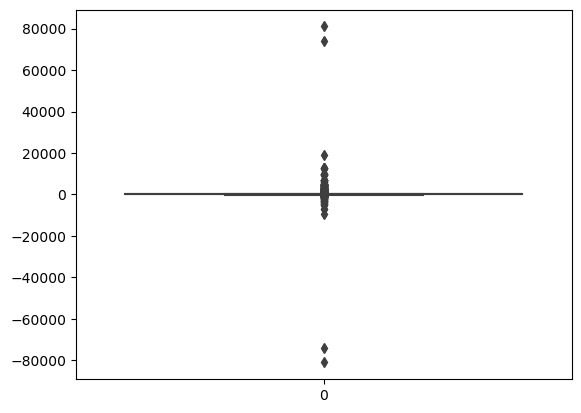

In [418]:
x=df['Quantity']
sns.boxplot(x)

In [419]:
df_qtt_neg = df.sort_values(by='Quantity')

df_qtt_neg.head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1065883,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
587085,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
529729,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,2010-09-28 11:02:00,0.08,14277.0,France
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,2010-09-28 11:02:00,0.13,14277.0,France
359630,C524235,16047,POP ART PEN CASE & PENS,-5184,2010-09-28 11:02:00,0.08,14277.0,France
359636,C524235,37340,MULTICOLOUR SPRING FLOWER MUG,-4992,2010-09-28 11:02:00,0.10,14277.0,France
359653,C524235,85110,BLACK SILVER FLOWER T-LIGHT HOLDER,-4752,2010-09-28 11:02:00,0.07,14277.0,France
359658,C524235,16046,TEATIME PEN CASE & PENS,-4608,2010-09-28 11:02:00,0.08,14277.0,France
359654,C524235,85160A,WHITE BIRD GARDEN DESIGN MUG,-4320,2010-09-28 11:02:00,0.13,14277.0,France


In [420]:
df_qtt = df.sort_values(by='Quantity', ascending=False)
df_qtt.head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.10,13902.0,Denmark
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.10,13902.0,Denmark
1027583,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.10,13902.0,Denmark
135030,502269,21981,PACK OF 12 WOODLAND TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
135029,502269,21980,PACK OF 12 RED SPOTTY TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom


### Suppression des valeurs abérantes

In [421]:
lignes_a_supprimer = [1065882, 587080, 1065883, 587085]
df = df.drop(lignes_a_supprimer)


In [422]:
df.sort_values(by='Quantity', ascending=False).head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.10,13902.0,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.10,13902.0,Denmark
1027583,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.10,13902.0,Denmark
135027,502269,21984,PACK OF 12 PINK PAISLEY TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
135030,502269,21981,PACK OF 12 WOODLAND TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
135028,502269,21982,PACK OF 12 SUKI TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
135029,502269,21980,PACK OF 12 RED SPOTTY TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom


In [423]:
df.sort_values(by='Quantity', ascending=True).head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
529729,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,2010-09-28 11:02:00,0.08,14277.0,France
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,2010-09-28 11:02:00,0.13,14277.0,France
359630,C524235,16047,POP ART PEN CASE & PENS,-5184,2010-09-28 11:02:00,0.08,14277.0,France
359636,C524235,37340,MULTICOLOUR SPRING FLOWER MUG,-4992,2010-09-28 11:02:00,0.10,14277.0,France
359653,C524235,85110,BLACK SILVER FLOWER T-LIGHT HOLDER,-4752,2010-09-28 11:02:00,0.07,14277.0,France
359658,C524235,16046,TEATIME PEN CASE & PENS,-4608,2010-09-28 11:02:00,0.08,14277.0,France
359654,C524235,85160A,WHITE BIRD GARDEN DESIGN MUG,-4320,2010-09-28 11:02:00,0.13,14277.0,France
359674,C524235,85184D,S/4 BLUE ROUND DECOUPAGE BOXES,-3936,2010-09-28 11:02:00,0.42,14277.0,France
359660,C524235,16162L,THE KING GIFT BAG,-3744,2010-09-28 11:02:00,0.05,14277.0,France


## Creation de colonne Total des ventes 

In [424]:
df['TotalSale'] = df['Quantity'] * df['Price']

## Creation colonnes annee/mois

In [425]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

## Chiffre d'affaire annuel, mensuel, par pays

In [426]:
ventes_annuel = df.groupby('Year')['TotalSale'].sum()

ventes_mensuel = df.groupby(['Year', 'Month'])['TotalSale'].sum()

ventes_par_pays = df.groupby('Country')['TotalSale'].sum()


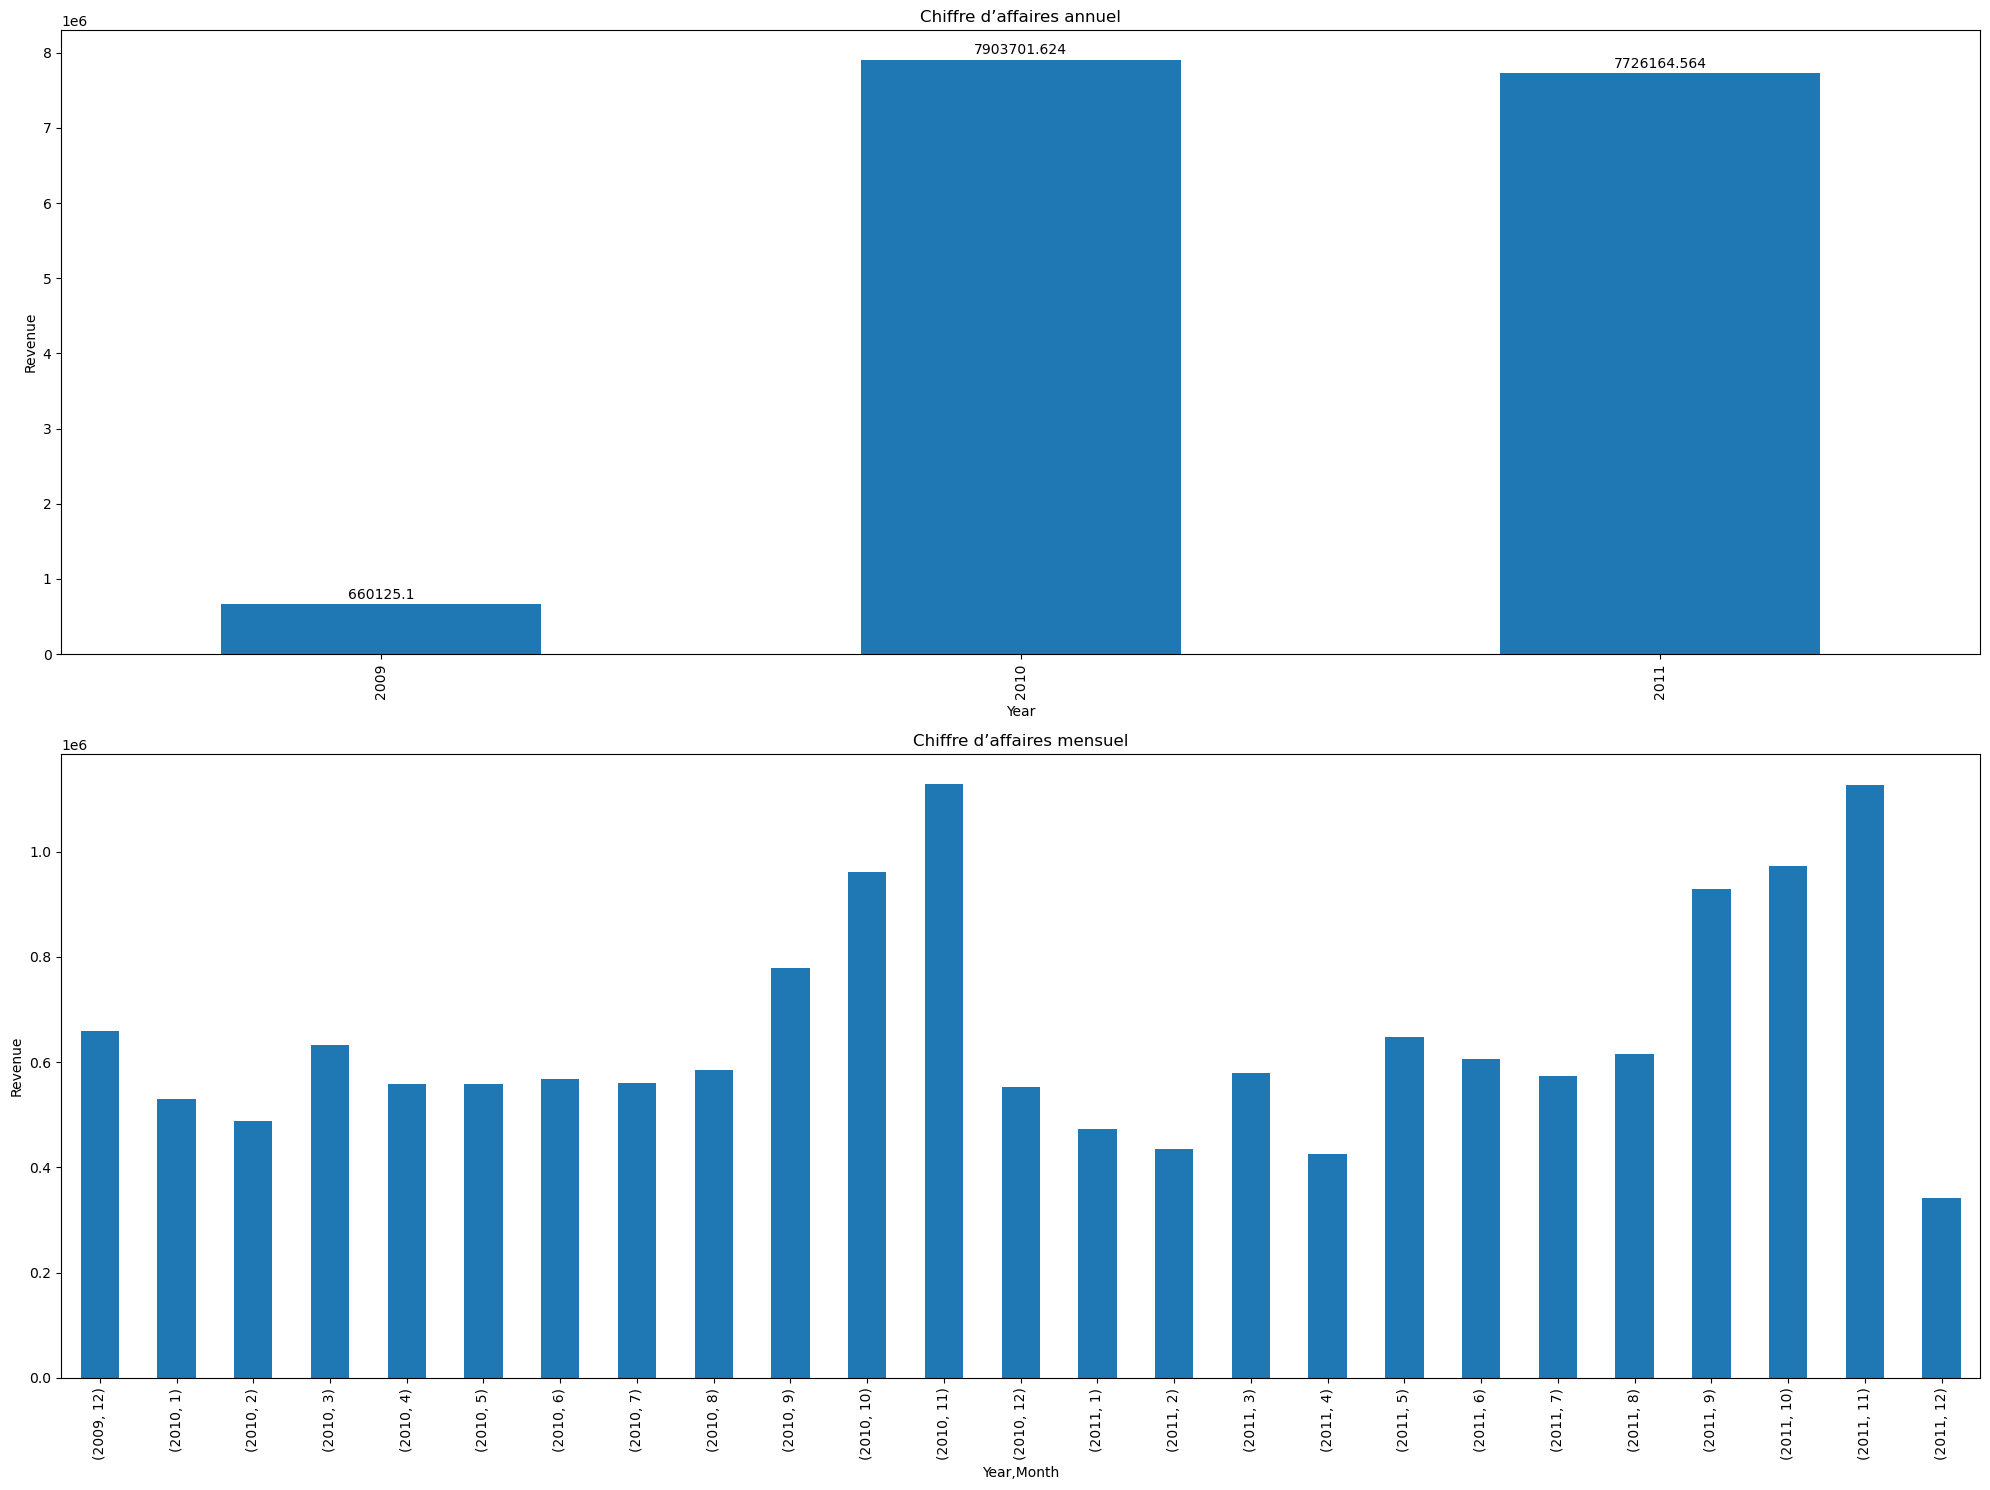

In [432]:
ventes_par_pays = ventes_par_pays.sort_values(ascending=False)
fig, axes = plt.subplots(2, 1, figsize=(20,15))

ventes_annuel.plot(kind='bar', ax=axes[0])
axes[0].set_title('Chiffre d’affaires annuel')
axes[0].set_ylabel('Revenue')
values = ventes_annuel.values.tolist()  
axes[0].bar_label(axes[0].containers[0], labels=values, padding=2)

ventes_mensuel.plot(kind='bar', ax=axes[1])
axes[1].set_title('Chiffre d’affaires mensuel')
axes[1].set_ylabel('Revenue')

plt.tight_layout()
plt.show()


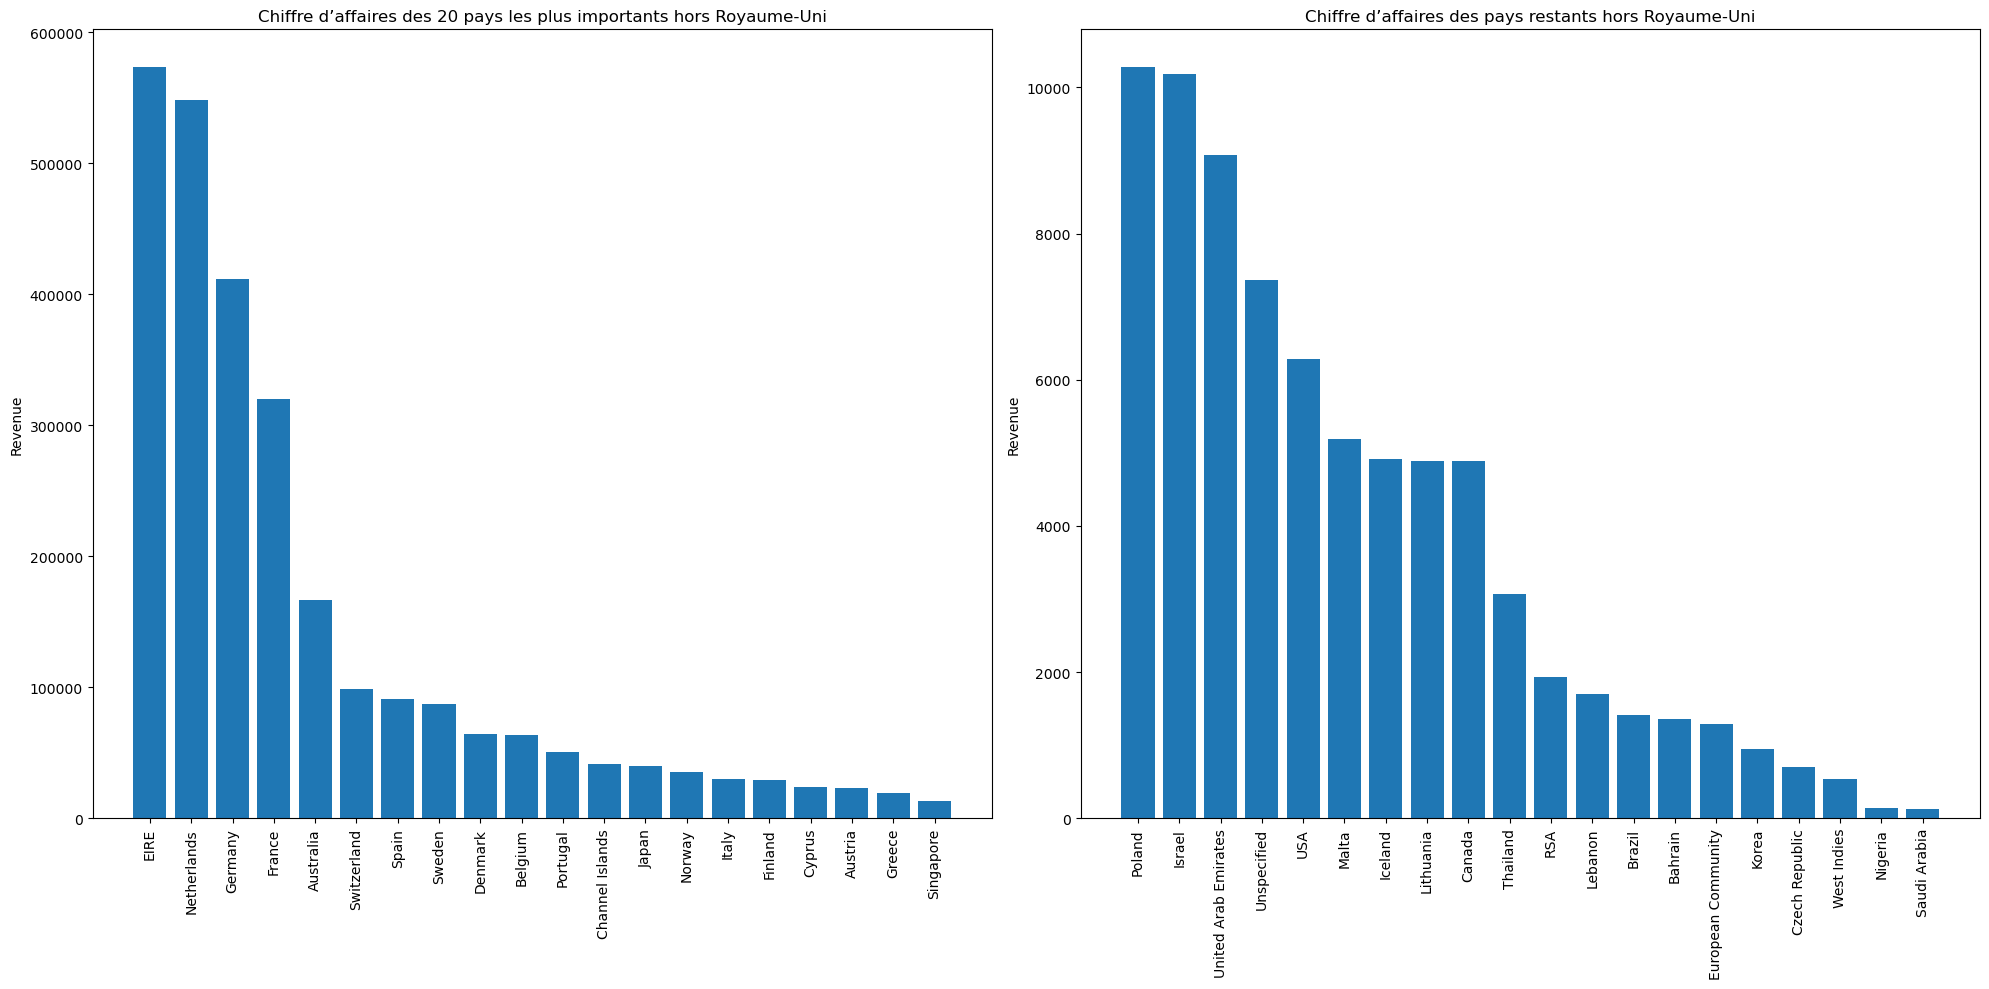

In [ ]:
autres_pays = ventes_par_pays[ventes_par_pays.index != 'United Kingdom']
autres_pays = autres_pays.sort_values(ascending=False)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

hors_uk_top20 = autres_pays[:20]
axs[0].bar(hors_uk_top20.index, hors_uk_top20.values)
axs[0].set_title('Chiffre d’affaires des 20 pays les plus importants hors Royaume-Uni')
axs[0].set_ylabel('Revenue')
axs[0].tick_params(axis='x', rotation=90)

hors_uk_pays_restant = autres_pays[20:]
axs[1].bar(hors_uk_pays_restant.index, hors_uk_pays_restant.values)
axs[1].set_title('Chiffre d’affaires des pays restants hors Royaume-Uni')
axs[1].set_ylabel('Revenue')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [ ]:


qtt_negative_pays = qtt_negative.groupby('Country')['Quantity'].sum()

top_pays = qtt_negative_pays.sort_values().head(5)

top_pays


Country
United Kingdom   -351603
France            -90330
EIRE               -8554
Spain              -5651
Germany            -3357
Name: Quantity, dtype: int64

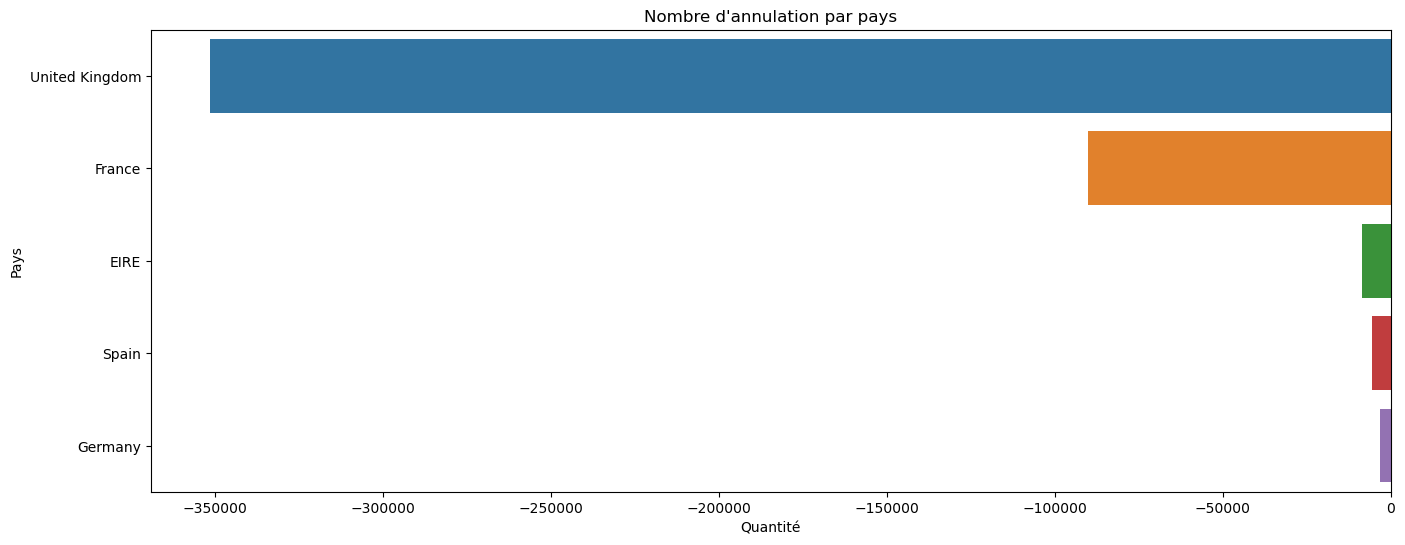

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(y=top_pays.index, x=top_pays.values, orient='h')
plt.xlabel('Quantité')
plt.ylabel('Pays')
plt.title("Nombre d'annulation par pays")
plt.show()


## Top 10 produit


In [ ]:
top_produits = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)


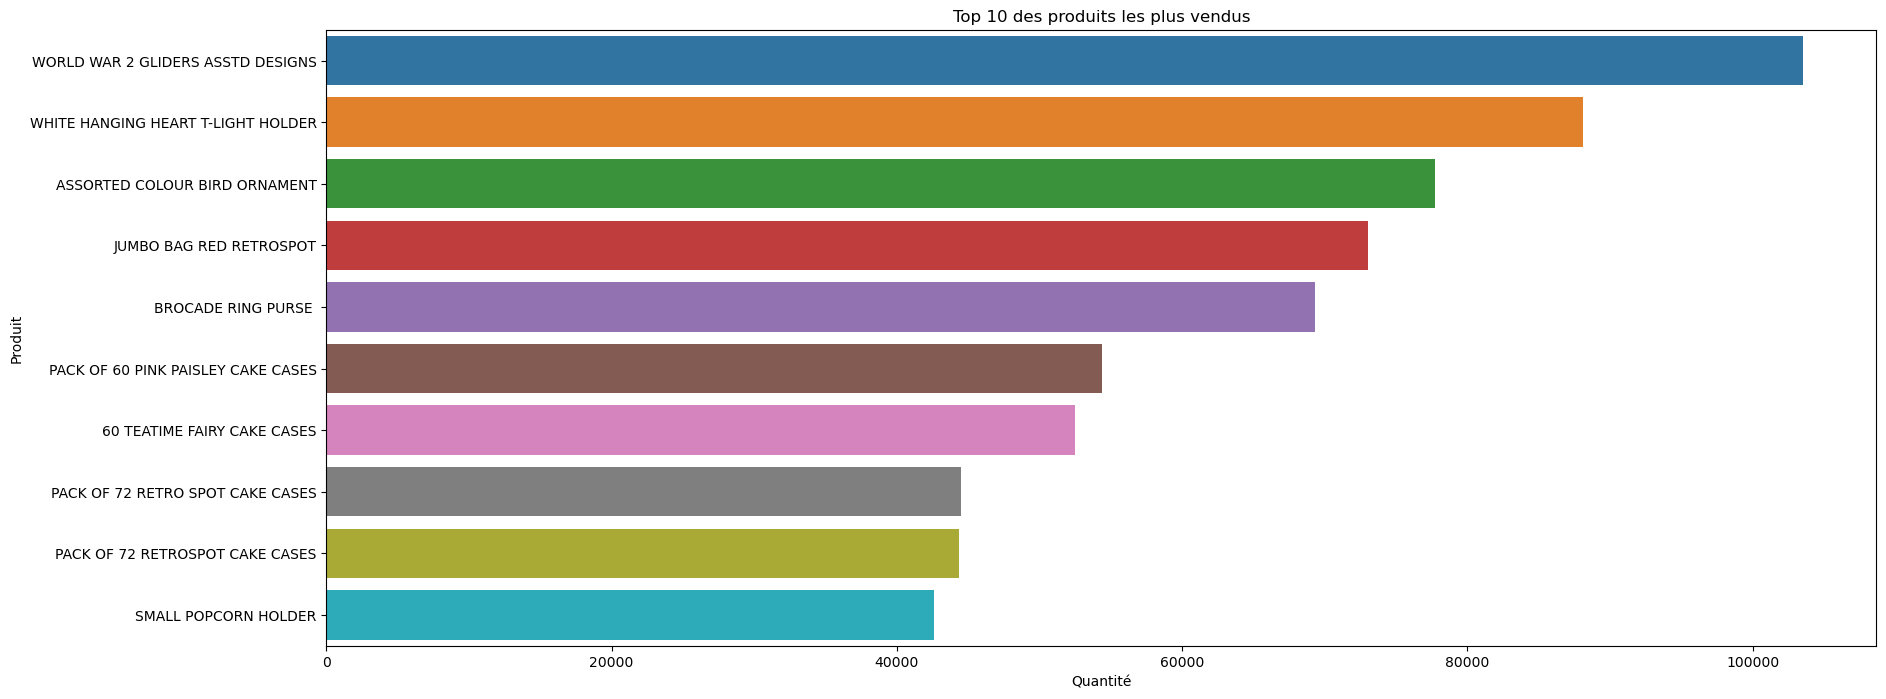

In [ ]:
top_10_produits = top_produits.head(10)

plt.figure(figsize=(20, 8))
sns.barplot(y=top_10_produits.index, x=top_10_produits.values, orient='h')
plt.xlabel('Quantité')
plt.ylabel('Produit')
plt.title('Top 10 des produits les plus vendus')
plt.show()


## Clients

In [ ]:
df['Customer ID'].nunique()

5942

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSale,Year,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009,12
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011,12


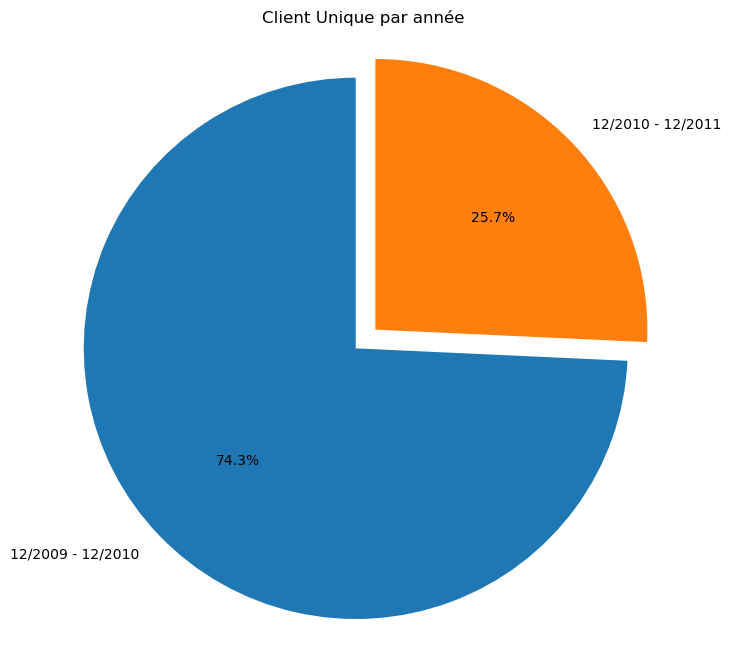

In [434]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df_2009_2010 = df[(df['InvoiceDate'] >= '2009-12-01') & (df['InvoiceDate'] <= '2010-12-31')]
df_2010_2011 = df[(df['InvoiceDate'] >= '2010-12-01') & (df['InvoiceDate'] <= '2011-12-31')]

clients_unique_2009_2010 = df_2009_2010['Customer ID'].unique()
clients_unique_2010_2011 = df_2010_2011['Customer ID'].unique()

nv_clients_2010_2011 = [client for client in clients_unique_2010_2011 if client not in clients_unique_2009_2010]

client_unique_09_10 = len(clients_unique_2009_2010)
client_unique_10_11 = len(nv_clients_2010_2011)

labels = ['12/2009 - 12/2010', '12/2010 - 12/2011']
sizes = [client_unique_09_10, client_unique_10_11]

explode = (0.1, 0) 
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 

plt.title('Client Unique par année ')
plt.show()


/tmp/ipykernel_80967/1099570760.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nv_clients['Month-Year'] = df_nv_clients['InvoiceDate'].dt.to_period('M')


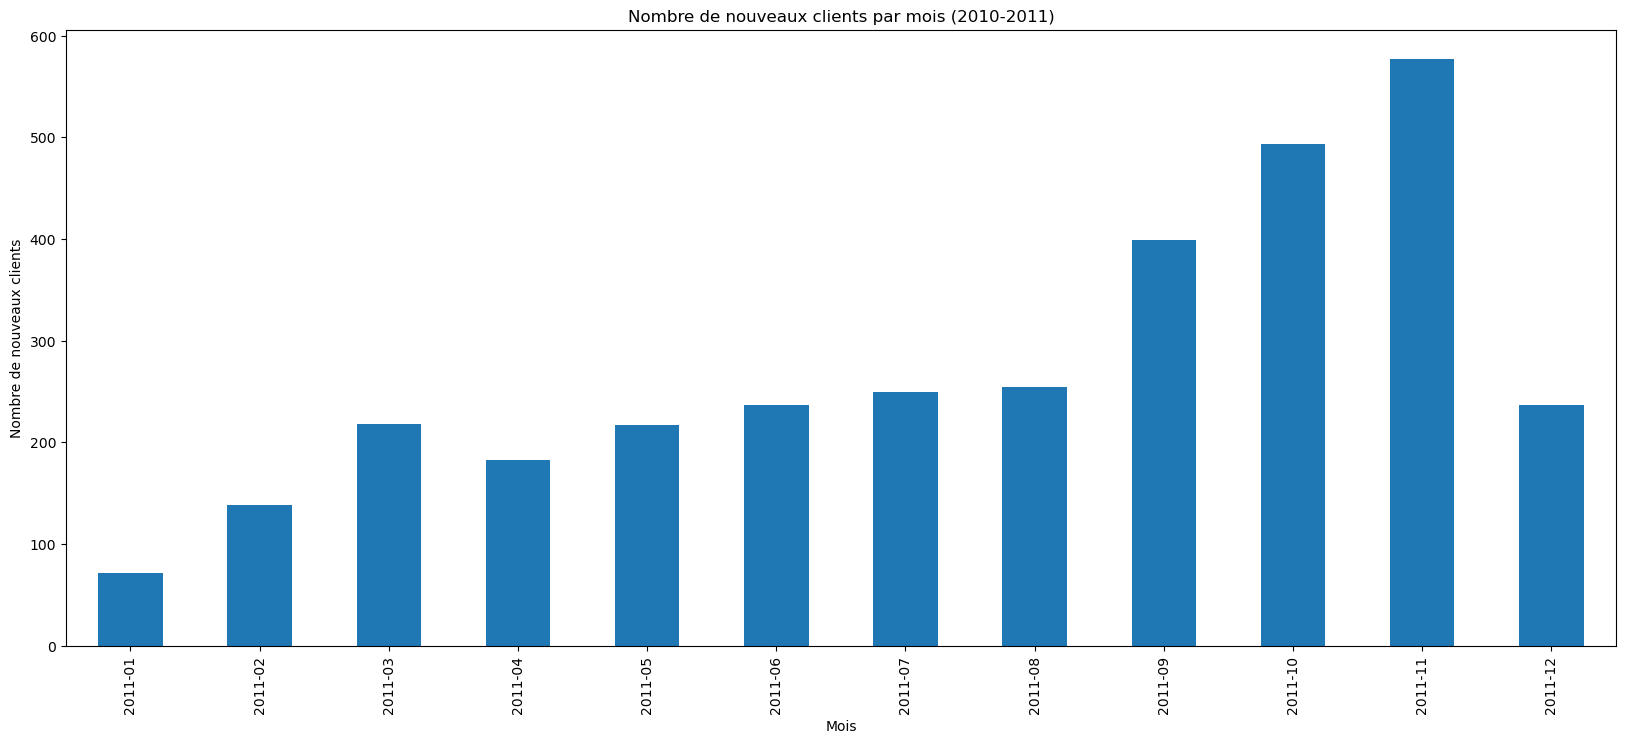

In [ ]:
clients_unique_2009_2010 = set(df_2009_2010['Customer ID'].unique())
clients_unique_2010_2011 = set(df_2010_2011['Customer ID'].unique())

nv_clients_2010_2011 = clients_unique_2010_2011.difference(clients_unique_2009_2010)
df_nv_clients = df_2010_2011[df_2010_2011['Customer ID'].isin(nv_clients_2010_2011)]

df_nv_clients['Month-Year'] = df_nv_clients['InvoiceDate'].dt.to_period('M')
nv_clients_par_mois = df_nv_clients.groupby('Month-Year')['Customer ID'].nunique()


plt.figure(figsize=(20, 8)) 
nv_clients_par_mois.plot(kind='bar')


plt.title('Nombre de nouveaux clients par mois (2010-2011)')
plt.xlabel('Mois')
plt.ylabel('Nombre de nouveaux clients')
plt.show()


In [ ]:
total_vente_ancien_client_10_11 = df_2010_2011[df_2010_2011['Customer ID'].isin(clients_unique_2009_2010)]['Quantity'].sum()

total_vente_nv_client_10_11 = df_2010_2011[df_2010_2011['Customer ID'].isin(nv_clients_2010_2011)]['Quantity'].sum()

taux_achat_ancien_client = total_vente_ancien_client_10_11 / client_unique_09_10
taux_achat_nv_client = total_vente_nv_client_10_11 / client_unique_10_11

print(f"Taux d'achat des anciens clients : {taux_achat_ancien_client}")
print(f"Taux d'achat des nouveaux clients : {taux_achat_nv_client}")


Taux d'achat des anciens clients : 908.0018128257421
Taux d'achat des nouveaux clients : 579.359058207979


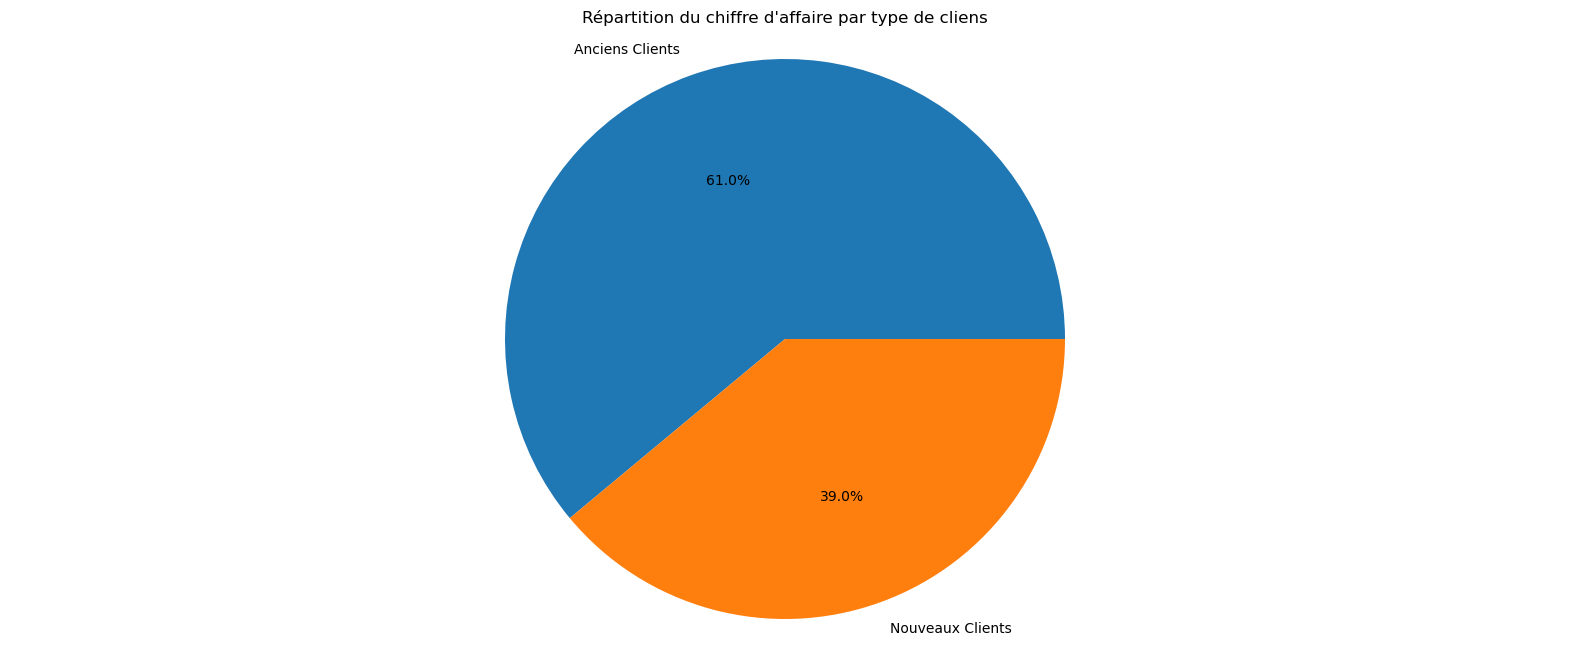

In [437]:
x = ['Anciens Clients', 'Nouveaux Clients']

y = [taux_achat_ancien_client, taux_achat_nv_client]



plt.figure(figsize=(20, 8))
plt.title("Répartition du chiffre d'affaire par type de cliens")
plt.pie(y, labels=x, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSale,Year,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009,12
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011,12


## Creation de variables rfm

In [ ]:
date_de_ref = max(df_2009_2010['InvoiceDate']) + pd.DateOffset(days=1)

rfm = df_2009_2010.groupby(['Customer ID']).agg({
    'InvoiceDate': lambda x: (date_de_ref - x.max()).days,  
    'Invoice': 'nunique',  
    'TotalSale': 'sum'  
}).reset_index()

rfm.rename(columns={
    'InvoiceDate': 'Recence',
    'Invoice': 'Frequence',
    'TotalSale': 'Montant'
}, inplace=True)

rfm

,Customer ID,Recence,Frequence,Montant
0,12346.0,80,15,-51.74
1,12347.0,17,2,1323.32
2,12348.0,7,2,1114.96
3,12349.0,57,4,2646.99
4,12351.0,25,1,300.93
...,...,...,...,...
4408,18283.0,32,6,619.37
4409,18284.0,79,2,436.68
4410,18285.0,310,1,427.00
4411,18286.0,126,3,1188.43


In [ ]:
df_rfm = df.merge(rfm, on='Customer ID')
df_rfm = df_rfm.drop(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Year', 'Month'], axis=1)
df_rfm = df_rfm.drop_duplicates(subset=["Customer ID"])
df_rfm

,Customer ID,Country,TotalSale,Recence,Frequence,Montant
0,13085.0,United Kingdom,83.40,70,7,1187.08
92,13078.0,United Kingdom,59.50,9,56,16810.42
937,15362.0,United Kingdom,12.60,98,2,613.08
977,18102.0,United Kingdom,27.44,15,95,341776.73
2027,12682.0,France,17.40,15,24,11657.59
...,...,...,...,...,...,...
704705,16270.0,United Kingdom,30.00,3,1,1141.24
704759,12515.0,Italy,17.00,3,1,383.70
704775,12383.0,Belgium,30.00,2,1,600.72
704875,13817.0,Germany,17.70,1,1,128.70


In [ ]:
df_rfm["Customer ID"].nunique()

4413

In [ ]:
df_rfm.describe()

,Customer ID,TotalSale,Recence,Frequence,Montant
count,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000
mean,15351.166553,14.371741,100.300023,5.527759,1940.590692
std,1702.876432,466.863004,99.879409,10.403398,8644.303161
min,12346.000000,-25111.090000,1.000000,1.000000,-25111.090000
25%,13879.000000,7.650000,28.000000,1.000000,285.410000
50%,15356.000000,15.000000,61.000000,3.000000,663.700000
75%,16840.000000,25.200000,145.000000,6.000000,1666.040000
max,18287.000000,3210.240000,388.000000,278.000000,341776.730000


## Annulation par client

In [ ]:

annulation_par_client = df[df['Quantity'] < 0].groupby('Customer ID').size()
annulation_df = annulation_par_client.reset_index().rename(columns={0: 'Nb_Annulations'})

total_commandes_par_client = df.groupby('Customer ID').size()
total_commandes_df = total_commandes_par_client.reset_index().rename(columns={0: 'Total_Commandes'})

df_rfm = df_rfm.merge(annulation_df, on='Customer ID', how='left')
df_rfm = df_rfm.merge(total_commandes_df, on='Customer ID', how='left')

df_rfm['Nb_Annulations'] = df_rfm['Nb_Annulations'].fillna(0)

df_rfm

,Customer ID,Country,TotalSale,Recence,Frequence,Montant,Nb_Annulations,Total_Commandes
0,13085.0,United Kingdom,83.40,70,7,1187.08,8.0,92
1,13078.0,United Kingdom,59.50,9,56,16810.42,54.0,845
2,15362.0,United Kingdom,12.60,98,2,613.08,0.0,40
3,18102.0,United Kingdom,27.44,15,95,341776.73,10.0,1050
4,12682.0,France,17.40,15,24,11657.59,3.0,992
...,...,...,...,...,...,...,...,...
4408,16270.0,United Kingdom,30.00,3,1,1141.24,0.0,54
4409,12515.0,Italy,17.00,3,1,383.70,0.0,16
4410,12383.0,Belgium,30.00,2,1,600.72,1.0,100
4411,13817.0,Germany,17.70,1,1,128.70,0.0,24


In [ ]:
montant_max = df_rfm['Montant'].quantile(0.75)
montant_min = df_rfm['Montant'].quantile(0.25)

mask = df_rfm['Montant'] <= montant_max
mask2 = df_rfm['Montant'] >= montant_min

df_filtered = df_rfm[mask]
df_filtered = df_filtered[mask2]
df_filtered.describe()

/tmp/ipykernel_80967/1723115484.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[mask2]


,Customer ID,TotalSale,Recence,Frequence,Montant,Nb_Annulations,Total_Commandes
count,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000
mean,15369.446307,27.914482,95.968736,3.424105,763.338850,1.790213,96.572270
std,1703.854307,69.908252,90.232562,2.387357,381.446421,4.743745,110.084868
min,12347.000000,-229.460000,1.000000,1.000000,285.410000,0.000000,1.000000
25%,13891.500000,8.500000,31.000000,2.000000,432.220000,0.000000,34.000000
50%,15362.000000,15.000000,64.000000,3.000000,663.700000,0.000000,65.000000
75%,16876.000000,23.250000,127.000000,4.000000,1047.510000,2.000000,120.000000
max,18286.000000,1569.600000,388.000000,22.000000,1666.040000,92.000000,1905.000000


In [ ]:
df_filtered.to_csv('seg_rfm.csv', index=False)

In [ ]:
# df.to_csv('cleaned_data.csv')

## RFM TEST


In [ ]:
date_de_ref = df['InvoiceDate'].max() + pd.DateOffset(days=1)

rfm_test= df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (date_de_ref - x.max()).days,
    'Invoice': 'nunique',
    'TotalSale': 'sum'
}).reset_index()

rfm_test.rename(columns={
    'InvoiceDate': 'Recence',
    'Invoice': 'Frequence',
    'TotalSale': 'Montant'
}, inplace=True)

rfm_test

,Customer ID,Recence,Frequence,Montant
0,12346.0,431,15,-51.74
1,12347.0,2,8,4921.53
2,12348.0,75,5,2019.40
3,12349.0,19,5,4404.54
4,12350.0,310,1,334.40
...,...,...,...,...
5937,18283.0,4,22,2664.90
5938,18284.0,430,2,436.68
5939,18285.0,661,1,427.00
5940,18286.0,477,3,1188.43


In [ ]:
rfm_test['Customer ID'].nunique()

5942

In [ ]:
rfm_test = df.merge(rfm_test, on='Customer ID')
rfm_test = rfm_test.drop(['Invoice', 'StockCode', 'Description', 'Quantity', 'Price', 'Year', 'Month'], axis=1)
rfm_test = rfm_test.drop_duplicates(subset=["Customer ID"])


rfm_test['Customer ID'].nunique()

5942

In [ ]:
annulation_par_client = df[df['Quantity'] < 0].groupby('Customer ID').size()
annulation_df = annulation_par_client.reset_index().rename(columns={0: 'Nb_Annulations'})

total_commandes_par_client = df.groupby('Customer ID').size()
total_commandes_df = total_commandes_par_client.reset_index().rename(columns={0: 'Total_Commandes'})

rfm_test = rfm_test.merge(annulation_df, on='Customer ID', how='left')
rfm_test = rfm_test.merge(total_commandes_df, on='Customer ID', how='left')

rfm_test['Nb_Annulations'] = rfm_test['Nb_Annulations'].fillna(0)

In [ ]:
q1 = rfm_test['Montant'].quantile(0.25)
q3 = rfm_test['Montant'].quantile(0.75)
iqr = q3 - q1

valeurs_aberants = q3 + 1.5 * iqr

rfm_test = rfm_test.drop(rfm_test[rfm_test['Montant'] > valeurs_aberants].index)


In [ ]:
montant_negative = rfm_test.loc[rfm_test['Montant'].round(2) < 0]
montant_negative.sort_values(by='Montant', ascending=True)


,InvoiceDate,Customer ID,Country,TotalSale,Recence,Frequence,Montant,Nb_Annulations,Total_Commandes
2959,2010-06-17 16:52:00,17399.0,United Kingdom,-25111.09,540,1,-25111.09,1.0,1
2100,2010-03-23 15:20:00,12918.0,United Kingdom,-10953.50,626,3,-10953.50,2.0,3
2425,2010-04-22 12:55:00,15849.0,United Kingdom,-5876.34,596,1,-5876.34,1.0,1
2056,2010-03-19 11:30:00,15760.0,Norway,-6958.17,631,5,-5795.87,3.0,5
2957,2010-06-17 15:49:00,16981.0,United Kingdom,-4620.86,540,1,-4620.86,1.0,1
...,...,...,...,...,...,...,...,...,...
3689,2010-10-04 16:38:00,16446.0,United Kingdom,-9.00,206,2,-6.10,1.0,3
2336,2010-04-13 10:14:00,14914.0,United Kingdom,-5.85,606,1,-5.85,1.0,1
617,2009-12-08 17:40:00,13112.0,United Kingdom,-7.95,541,3,-5.44,3.0,5
766,2009-12-11 12:40:00,16580.0,United Kingdom,-3.75,729,1,-5.00,2.0,2


In [ ]:
q1 = rfm_test['Montant'].quantile(0.25)
q3 = rfm_test['Montant'].quantile(0.75)
iqr = q3 - q1
valeurs_aberants_negatifs = q1 - 1.5 * iqr

rfm_test = rfm_test.drop(rfm_test[rfm_test['Montant'] < valeurs_aberants_negatifs].index)

rfm_test

,InvoiceDate,Customer ID,Country,TotalSale,Recence,Frequence,Montant,Nb_Annulations,Total_Commandes
0,2009-12-01 07:45:00,13085.0,United Kingdom,83.4,158,10,1459.46,8.0,92
2,2009-12-01 09:08:00,15362.0,United Kingdom,12.6,449,2,613.08,0.0,40
6,2009-12-01 09:46:00,13635.0,United Kingdom,13.5,68,6,2948.22,5.0,167
8,2009-12-01 09:55:00,12636.0,USA,141.0,739,1,141.00,0.0,1
9,2009-12-01 09:57:00,17519.0,United Kingdom,10.2,17,17,4767.50,2.0,206
...,...,...,...,...,...,...,...,...,...
5937,2011-12-07 12:20:00,15195.0,United Kingdom,3861.0,3,1,3861.00,0.0,1
5938,2011-12-08 10:33:00,13436.0,United Kingdom,11.7,2,1,196.89,0.0,12
5939,2011-12-08 10:58:00,15520.0,United Kingdom,10.2,2,1,343.50,0.0,18
5940,2011-12-08 13:11:00,13298.0,United Kingdom,90.0,1,1,360.00,0.0,2


In [ ]:
# rfm_test.to_csv('test_rfm.csv',index=False)